<a href="https://colab.research.google.com/github/hufexv/Basic_python_code/blob/main/Computer_Vision_CV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# prompt: tell current work place with the libarary os

import os
print(os.getcwd())

/content


In [ ]:
# prompt: generate a picture with cv named 'small.png' in current work place

np_img = np.zeros([512,512,3],dtype=np.uint8)
np_img.fill(255)
cv.imwrite('small.png', np_img)

True

In [ ]:
#shape and type of img
img = cv.imread('small.png')
print(img.shape, type(img))


(512, 512, 3) <class 'numpy.ndarray'>


In [ ]:
#save two kernnel picture
b_g_only = np.zeros_like(np_img)
b_g_only[:,:,0] = np_img[:,:,0]
b_g_only[:,:,1] = np_img[:,:,1]
cv.imwrite('t.png', b_g_only)

True

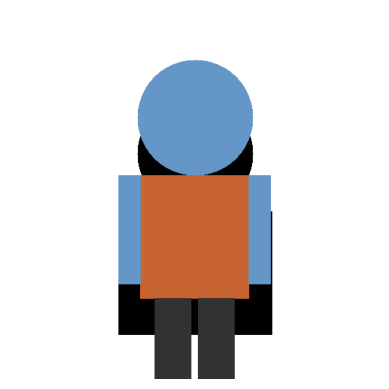

In [ ]:
# prompt: gnereate a person's picture with cv, and save as person.png, not just black and white, more like normal picture

# Draw a circle for the head
center_x = 256
center_y = 150
radius = 80
color_head = (200, 150, 100)  # Skin tone
cv.circle(np_img, (center_x, center_y), radius, color_head, -1)

# Draw a rectangle for the body
body_start_x = 180
body_start_y = 230
body_end_x = 330
body_end_y = 400
color_body = (50, 100, 200)  # Clothing color
cv.rectangle(np_img, (body_start_x, body_start_y), (body_end_x, body_end_y), color_body, -1)

# Draw arms
arm_width = 30
arm_height = 150
color_arms = (200, 150, 100) # Skin tone
# Left arm
cv.rectangle(np_img, (body_start_x - arm_width, body_start_y), (body_start_x, body_start_y + arm_height), color_arms, -1)
# Right arm
cv.rectangle(np_img, (body_end_x, body_start_y), (body_end_x + arm_width, body_start_y + arm_height), color_arms, -1)

# Draw legs
leg_width = 50
leg_height = 150
color_legs = (50, 50, 50) # Pants color
# Left leg
cv.rectangle(np_img, (body_start_x + 20, body_end_y), (body_start_x + 20 + leg_width, body_end_y + leg_height), color_legs, -1)
# Right leg
cv.rectangle(np_img, (body_end_x - 20 - leg_width, body_end_y), (body_end_x - 20, body_end_y + leg_height), color_legs, -1)

# Save the image
cv.imwrite('person.png', np_img)

# Display the image (optional)
plt.imshow(cv.cvtColor(np_img, cv.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


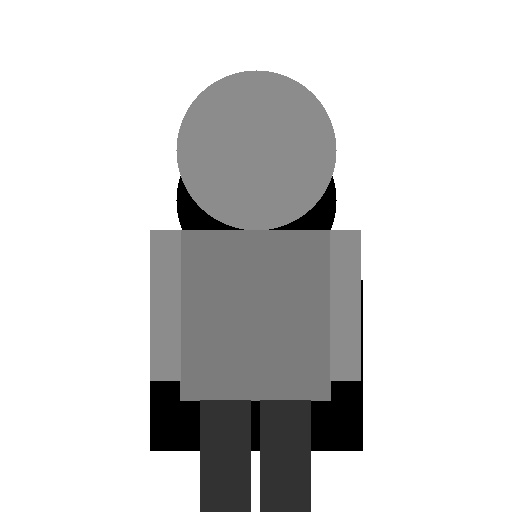

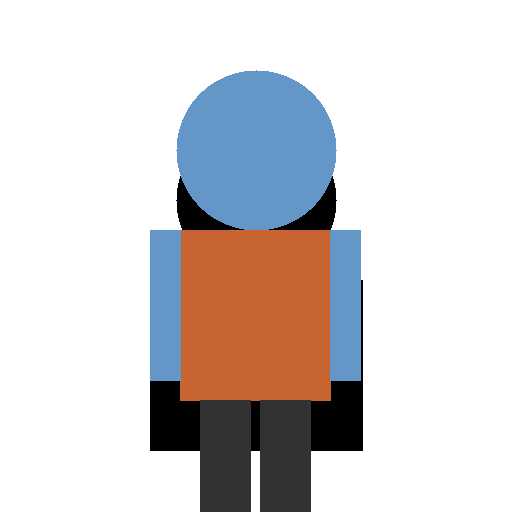

In [ ]:
#generate gray picture
from google.colab.patches import cv2_imshow

img = cv.imread('person.png')

Gray = img[:,:,0]*0.11 + img[:,:,1]*0.59 + img[:,:,2]*0.3
#Gray = Gray/255

cv2_imshow(Gray)
cv2_imshow(img)
#cv2.waitKey(0)
#cv.destroyAllWindows()

摄像头打开: True
视频尺寸：(0, 0)
成功读取第一帧：False
视频尺寸：(0, 0)


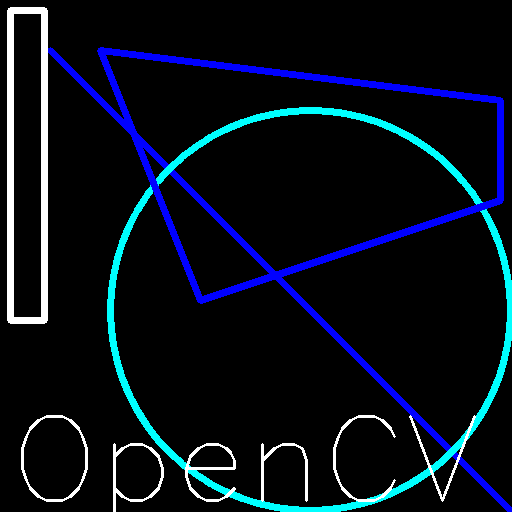

In [ ]:
#Basic_Procession
img = cv.imread('person.png', 1)#flag: -1(alpha透明通道) 0(Gray) 1(BGR)
#print(np.shape(img))
#cv2_imshow(img)
#cv.waitKey(0)
#cv.destroyAllWindows()

#convert to plot
#plt.imshow(img, cmap='gray')
#plt.show()

#transpose
#cv2_imshow(np.transpose(img, (1,0,2)))
#Snip
#cv2_imshow(img[100:200, 100:600])



#video_process
capture = cv.VideoCapture(0)
print(f"摄像头打开: {capture is not None}")
size = (int(capture.get(cv.CAP_PROP_FRAME_WIDTH)),
        int(capture.get(cv.CAP_PROP_FRAME_HEIGHT)))
print(f"视频尺寸：{size}")

fourcc = cv.VideoWriter_fourcc(*'mp4v')
out = cv.VideoWriter('output.mp4', fourcc, 20.0, size)
#get_pic_from_video
success, img = capture.read()
print(f"成功读取第一帧：{success}")
while success and cv.waitKey(1) == -1:
    cv2_imshow(img)
    success, img = capture.read()
    print(f"成功读取帧：{success}")
capture.release()
out.release()

#load_video_file
capture = cv.VideoCapture('output.mp4')
size = (int(capture.get(cv.CAP_PROP_FRAME_WIDTH)),
        int(capture.get(cv.CAP_PROP_FRAME_HEIGHT)))
print(f"视频尺寸：{size}")
success, frame = capture.read()
while success and cv.waitKey(1) == -1:
  cv2_imshow(frame)
  success, frame = capture.read()
capture.release()



#OpenCV_draw
img = np.zeros((512, 512, 3), np.uint8)

#line
cv.line(img, pt1=(50,50), pt2=(511,511), color=(255,0,0), thickness=5)
#rectangle
cv.rectangle(img, pt1=(10, 10), pt2=(44, 320), color=(255,255,255), thickness=5)
#ellipse
cv.ellipse(img, center=(310, 310), axes=(200,200), angle=0, startAngle=0, endAngle=360, color=(255,255,0), thickness=5)
#ploylines
pts = np.array([[100,50],[200,300],[500,200],[500,100]], np.int32)
pts = pts.reshape((-1,1,2))
cv.polylines(img, [pts], isClosed=True, color=(255,0,0), thickness=5)
#text
cv.putText(img, text='OpenCV', org=(10,500), fontFace=cv.FONT_HERSHEY_SIMPLEX, fontScale=4, color=(255,255,255), thickness=2)

cv2_imshow(img)

